## Lead scoring case study

### Problem statement

An education company named X Education markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

### Business goal

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Steps to execute to build logistic regression model :

#### Step 1: Import the required libraries

#### Step 2: Load and understand the data

#### Step 3: Data cleaning

#### Step 4: Data visualisation

#### Step 5: Data preparation

#### Step 6: Splitting the data into train and test sets

#### Step 7 : Feature scaling

#### Step 8: Model building

#### Step 9: Getting predicted values and analysing the metrics on train set

#### Step 10: Making predictions on test set

### Step1: Import the required libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', 280)
pd.set_option('display.max_rows', 280)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

###  Step2:  Load and understand the data

In [97]:
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [98]:
leads_df['Lead Number'].nunique(), leads_df['Prospect ID'].nunique()

(9240, 9240)

#### Understand the data

In [99]:
print(leads_df.shape)
print(leads_df.info())

(9240, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                     

In most of the forms where data is collected, the level Select by default appears in the drop downs of catagorical variables.
If level Select is choosen, it is nothing but nothing is choosen from the levels provided. This is treated as null value.
Hence we will replace all Select values with null.

In [100]:
# Replace level Select with nan in all the categorical variables having Select.
leads = leads_df.replace('Select', np.nan)

In [101]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [102]:
# Checkif there are any duplictes in the dataset
leads.duplicated().sum()

0

### Step 3: Data cleaning

#### Handling missing values

Display the null count and null percentage of the null columns

In [103]:
null_count = leads.isna().sum()[leads.isna().sum()>0]
null_percent = round(null_count/len(leads) * 100, 2)
null_df = pd.DataFrame({'Null_Count' :null_count , "Null_Percentage" : null_percent})
null_df.sort_values(by='Null_Percentage', ascending=False)

,Null_Count,Null_Percentage
How did you hear about X Education,7250,78.46
Lead Profile,6855,74.19
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Asymmetrique Activity Index,4218,45.65
City,3669,39.71
Specialization,3380,36.58
Tags,3353,36.29


#### Drop the columns having null values with more than 40%

In [104]:
leads.drop(['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index', 'City'], axis=1, inplace=True)

In [105]:
# Check the null values again
null_count = leads.isnull().sum()[leads.isnull().sum()>0]
null_percent = round(null_count/len(leads) * 100, 2)
null_df = pd.DataFrame({'Null_Count' :null_count , "Null_Percentage" : null_percent})
null_df.sort_values(by='Null_Percentage', ascending=False)

,Null_Count,Null_Percentage
Specialization,3380,36.58
Tags,3353,36.29
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63
TotalVisits,137,1.48
Page Views Per Visit,137,1.48
Last Activity,103,1.11
Lead Source,36,0.39


##### Plot the variables with nulls to visualise

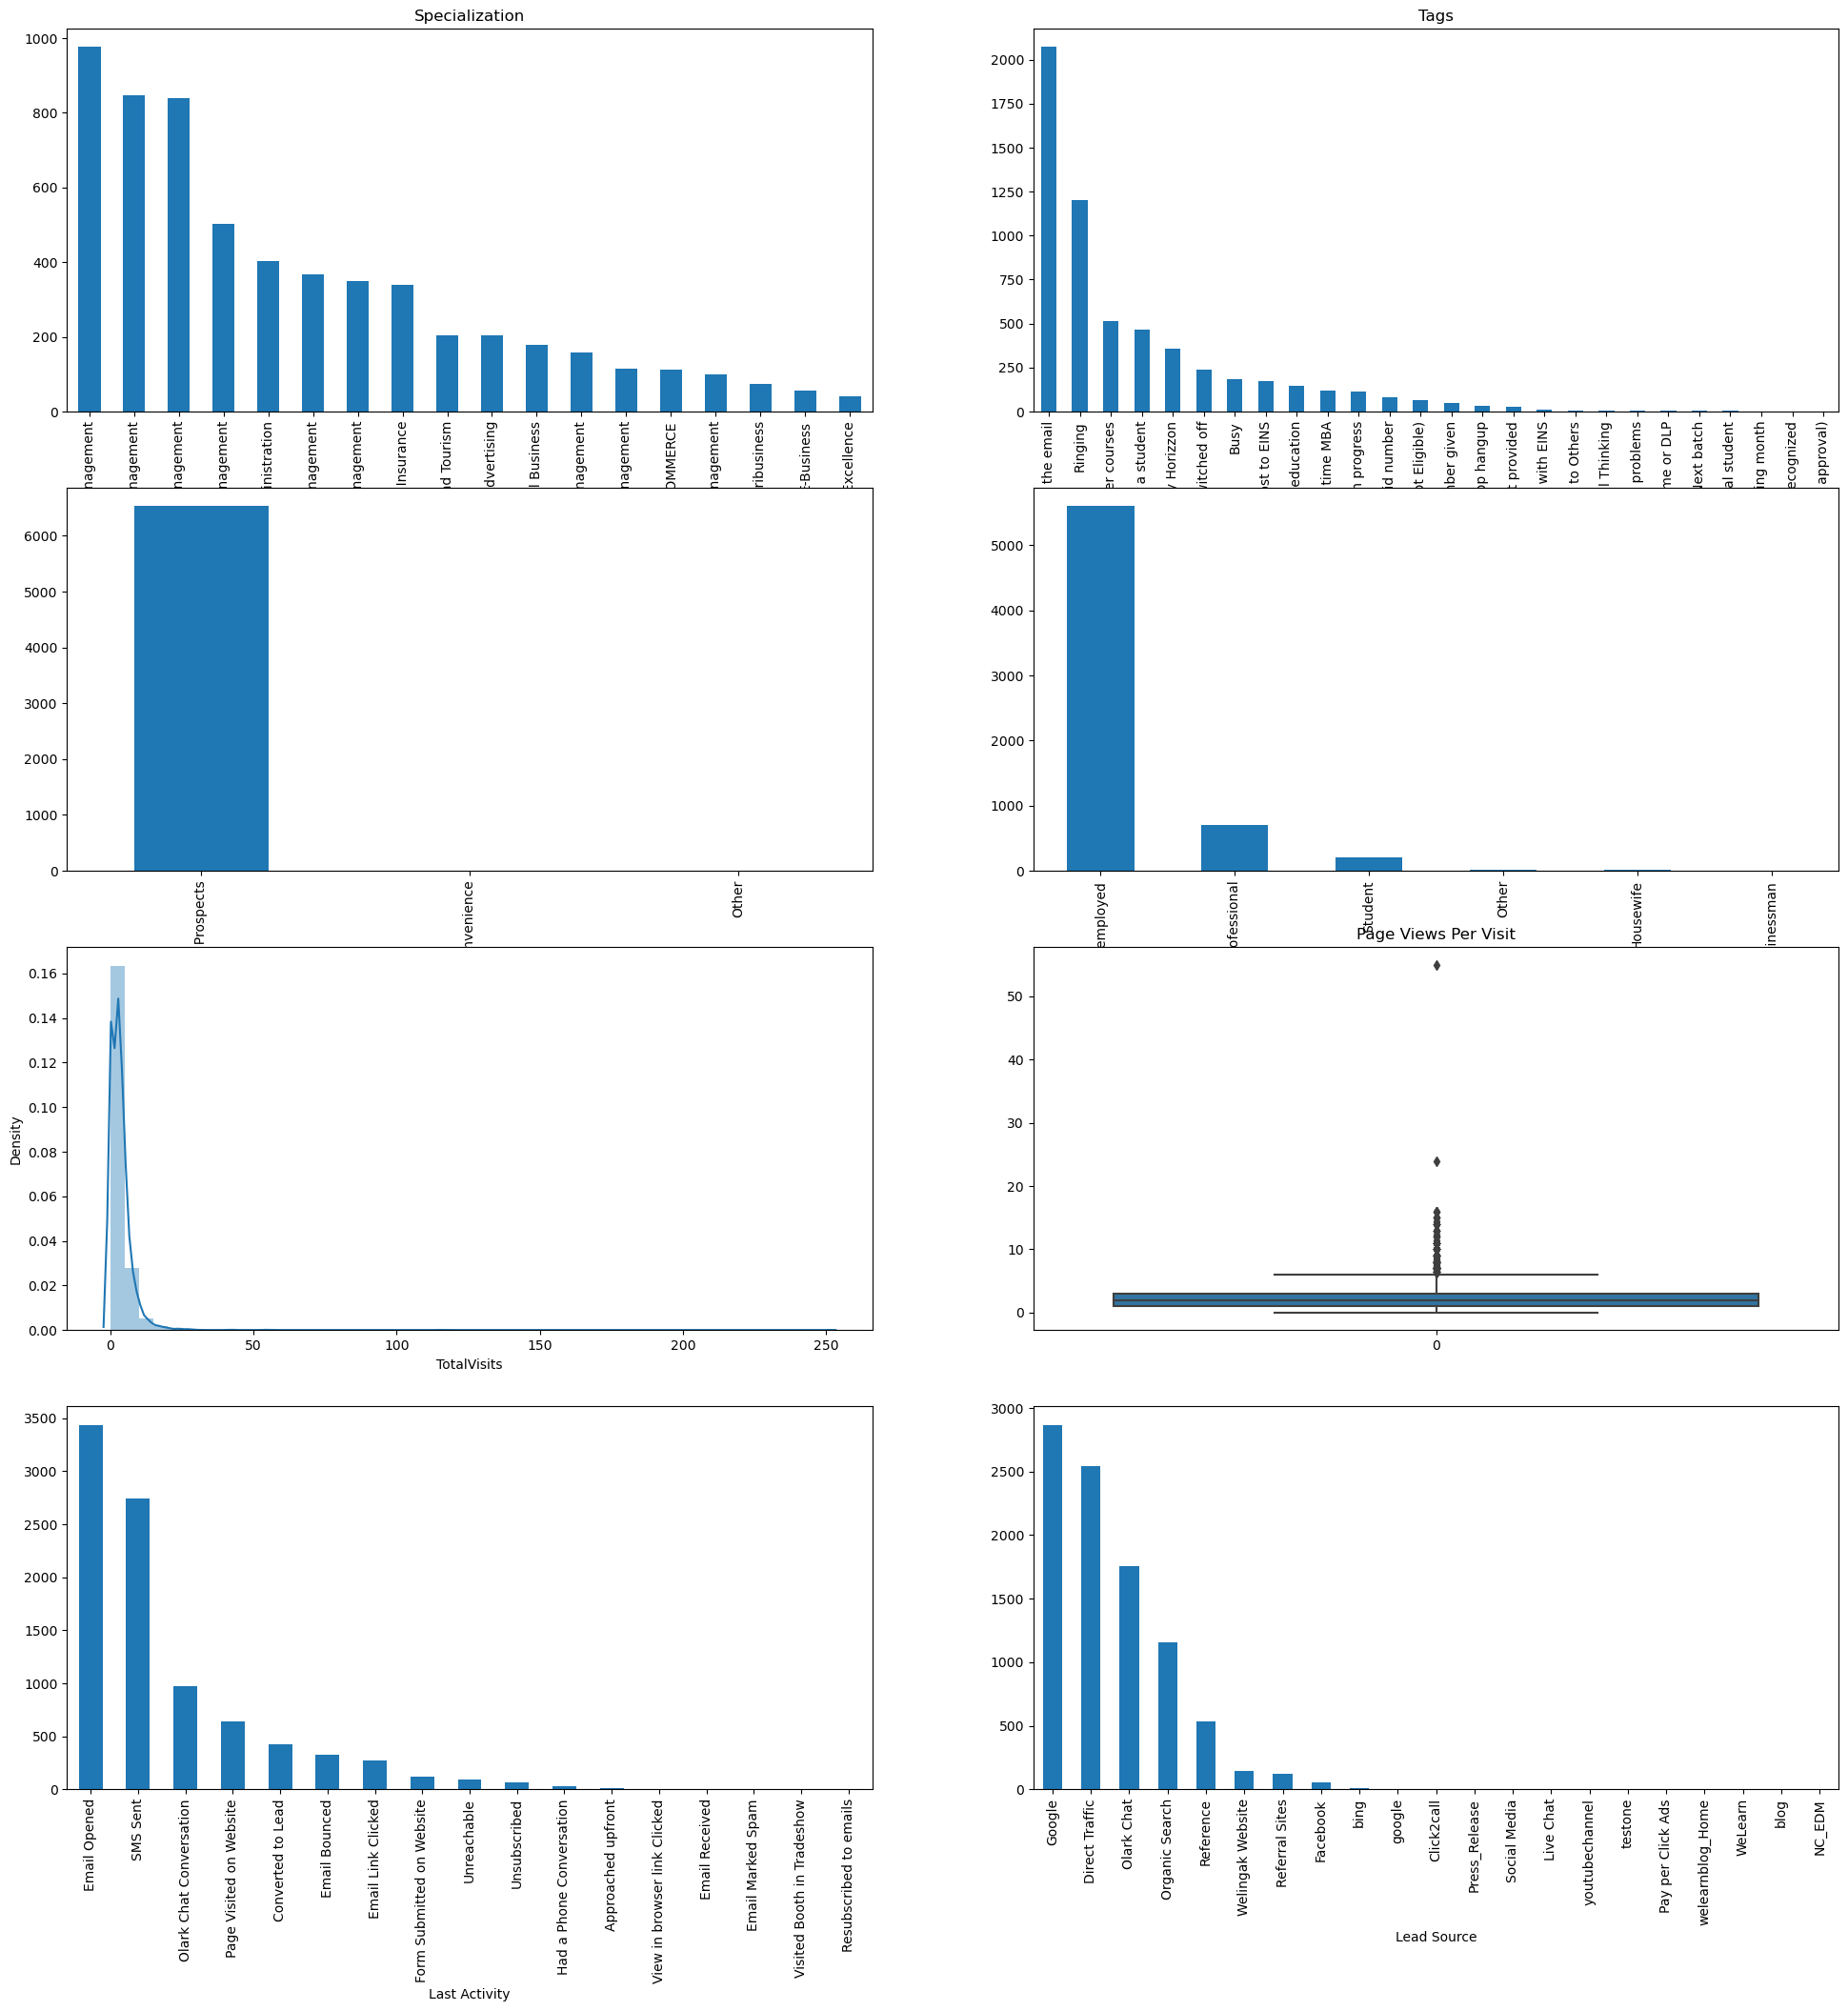

In [106]:
plt.figure(figsize=(24,24))
plt.subplot(4,2,1)
leads.Specialization.value_counts().plot.bar()
plt.title('Specialization')

plt.subplot(4,2,2)
leads.Tags.value_counts().plot.bar()
plt.title('Tags')

plt.subplot(4,2,3)
leads['What matters most to you in choosing a course'].value_counts().plot.bar()

plt.subplot(4,2,4)
leads['What is your current occupation'].value_counts().plot.bar()


plt.subplot(4,2,5)
sns.distplot(leads.TotalVisits)

plt.subplot(4,2,6)
sns.boxplot(leads['Page Views Per Visit'])
plt.title('Page Views Per Visit')

plt.subplot(4,2,7)
leads['Last Activity'].value_counts().plot.bar()

plt.subplot(4,2,8)
leads['Lead Source'].value_counts().plot.bar()
plt.show()

Specialization, Tags, What matters most to you in choosing a course, What is your current occupation, Country, TotalVisits, Page Views Per Visit, Last Activity and Lead Source seems to be right skewed.
We will replace it's nulls with mode for categorical and median for numerical.

In [107]:
# fill na
leads.Specialization.fillna(leads.Specialization.mode()[0], inplace=True)
leads.Tags.fillna(leads.Tags.mode()[0], inplace=True)
leads['What matters most to you in choosing a course'].fillna(leads['What matters most to you in choosing a course'].mode()[0], inplace=True)
leads['What is your current occupation'].fillna(leads['What is your current occupation'].mode()[0], inplace=True)
leads.Country.fillna(leads.Country.mode()[0], inplace=True)
# 0is nothing but if there are no visits
leads.TotalVisits.fillna(0, inplace=True)
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(), inplace=True)
leads['Last Activity'].fillna(leads['Last Activity'].mode()[0], inplace=True)
leads['Lead Source'].fillna(leads['Last Activity'].mode()[0], inplace=True)

In [108]:
# Check null values again
leads.isna().sum().sum()

0

In [109]:
# Check for catagorical variables
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        22
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

### Step4: Data visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

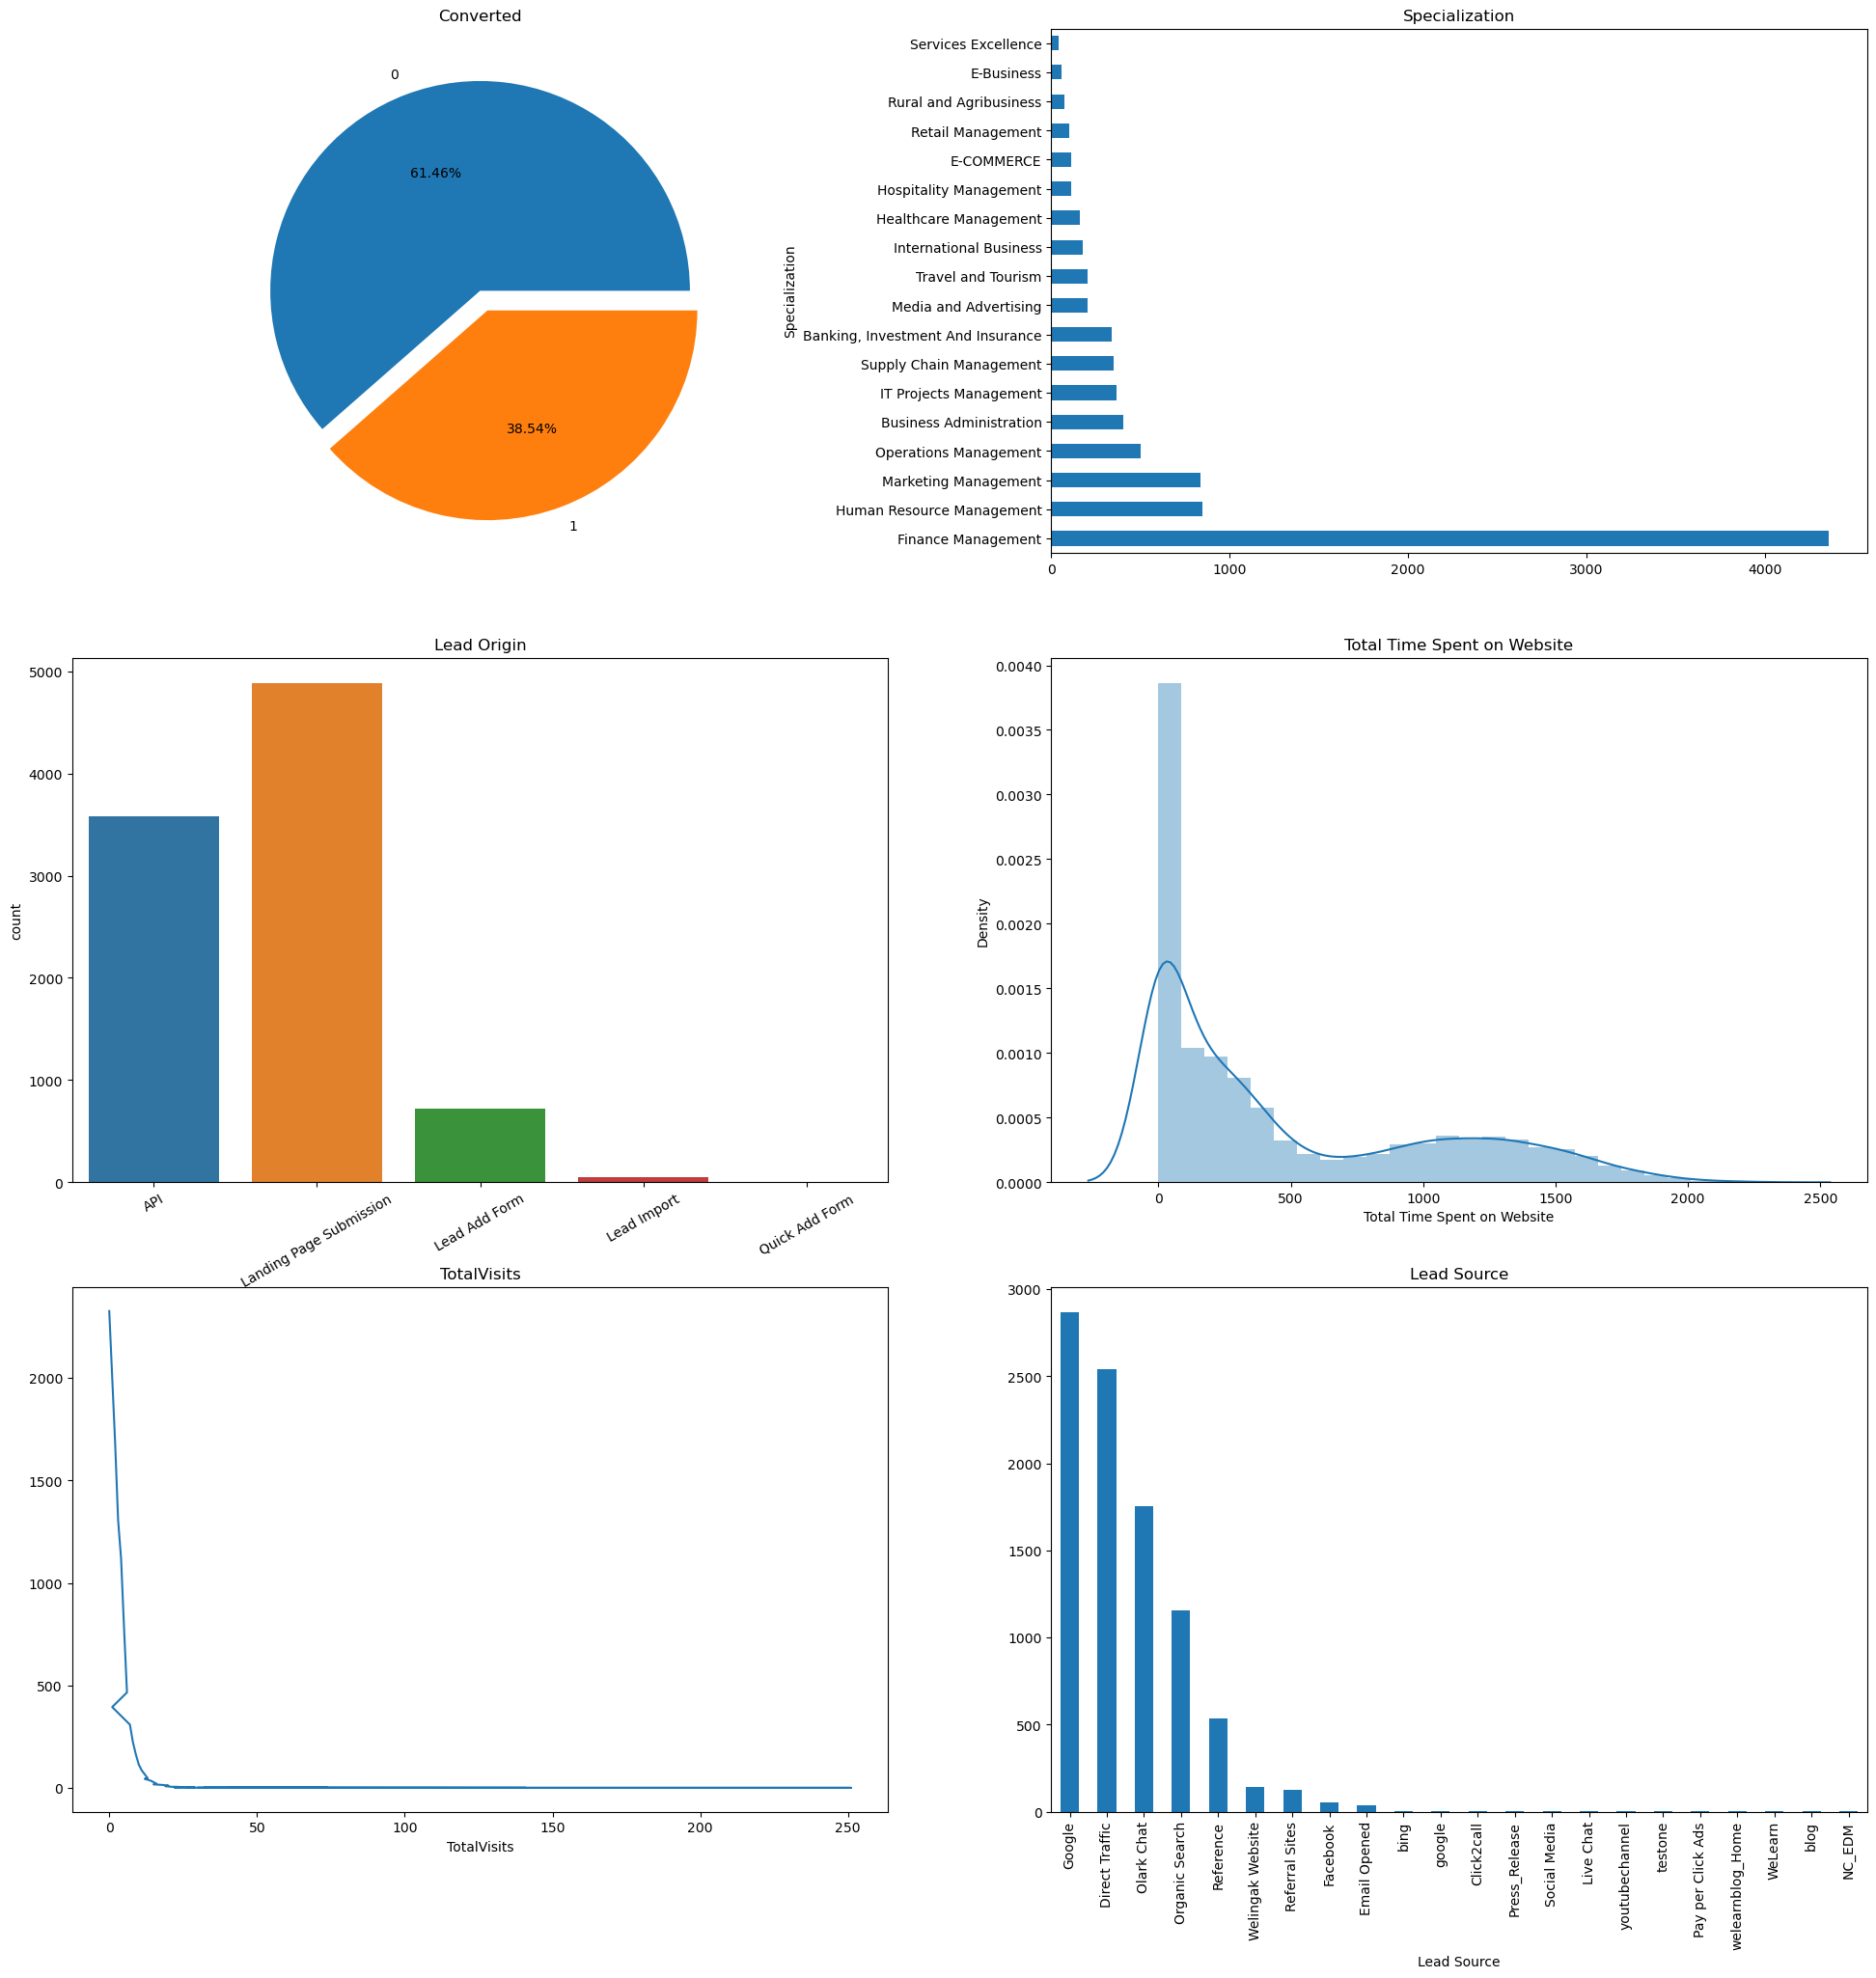

In [110]:
plt.figure(figsize=(24,24))

plt.subplot(3,2,1)
plt.pie(leads.Converted.value_counts(),labels = [0, 1],explode=[0,0.1], autopct = "%.2f%%")
plt.title('Converted')

plt.subplot(3,2,2)
leads['Specialization'].value_counts().plot.barh()
plt.title('Specialization')

plt.subplot(3,2,3)
sns.countplot(x=leads['Lead Origin'])
plt.xticks(rotation=30)
plt.title('Lead Origin')

plt.subplot(3,2,4)
sns.distplot(leads['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

plt.subplot(3,2,5)
leads['TotalVisits'].value_counts().plot.line()
plt.title('TotalVisits')

plt.subplot(3,2,6)
leads['Lead Source'].value_counts().plot.bar()
# sns.lineplot(leads['Lead Source'].value_counts())
plt.xticks(rotation=90)
plt.title('Lead Source')

plt.show

#### Insights: 
    Converted- The target variable Converted has around 39% leads who are converted and 61% who hasn't
    Specialization- Most of the customers are from Fianance Management
    Lead Origin- Most the customers who identified as lead were through 'Landing Page Submission'
    Total Time Spent on Website - There less number of customers who have spent more time on website
    Total Visits- There less number of customers who have vistied the website the most
    Lead Source- The Lead Source is most from Google

In [111]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

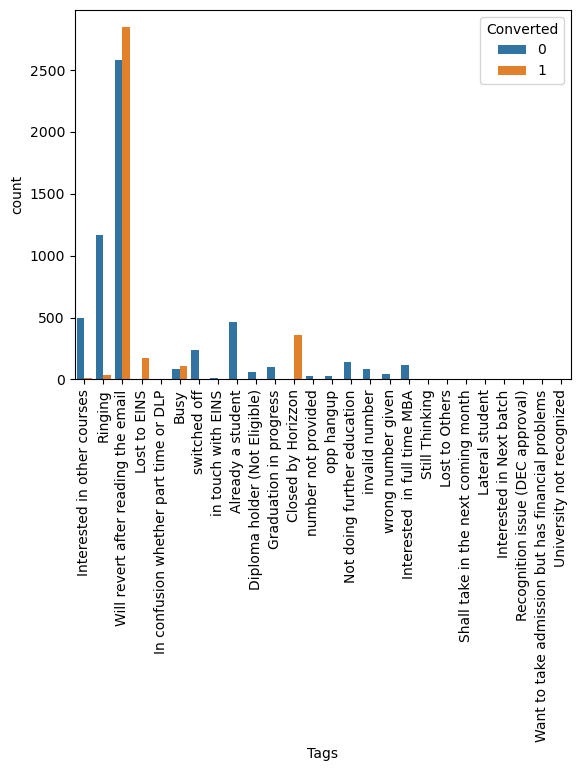

In [112]:
sns.countplot(x=leads['Tags'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.show()

Most of the customers are tagged to 'Will revert after reading the email' and among which maximum are converted to leads.

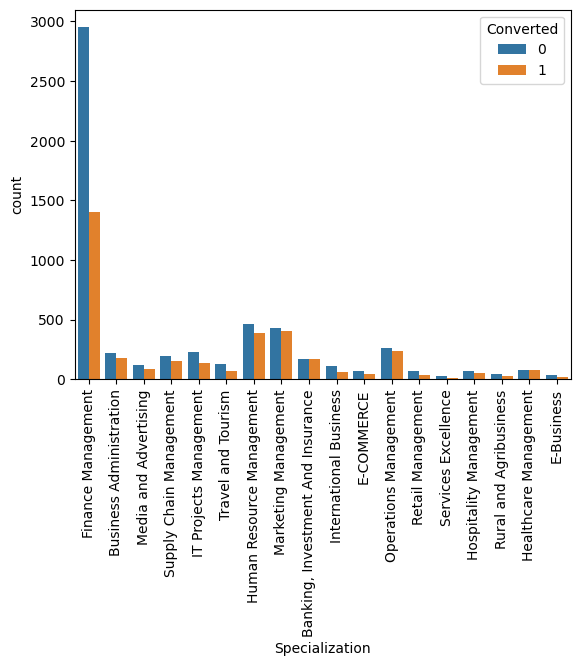

In [113]:
sns.countplot(x=leads['Specialization'], hue=leads['Converted'])
plt.xticks(rotation=90)
plt.show()

The maximum of the customers are from Finance Management and the conversion percentage to leads is nearly half of the customers who haven't converted.

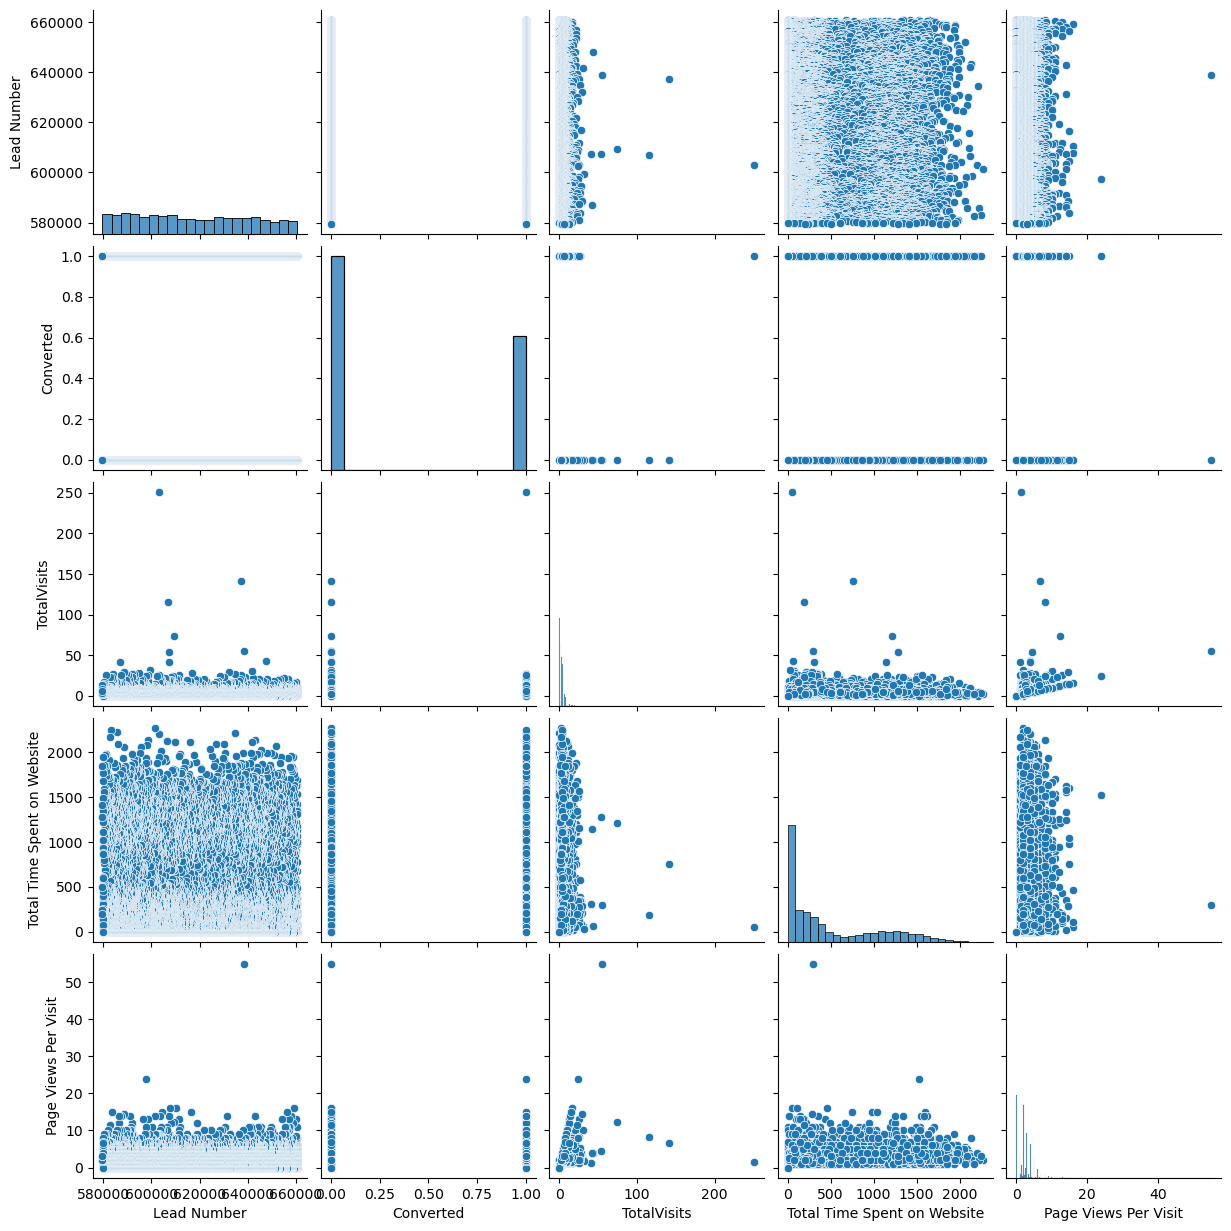

In [114]:
sns.pairplot(leads)
plt.show()

The target varible Converted with other variables seems to have moderate correlation, not highly correlated.

### Step 5: Data preparation

#### Converting binary variables from Yes or No to 1 or 0

In [115]:
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

In [116]:
binary_var = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

In [117]:
leads[binary_var] = leads[binary_var].apply(binary_map)

In [118]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,0,0,Modified


####  Creating dummy variables for some categorical features and dropping the first one

In [119]:
 dummy_var = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Last Notable Activity']

dummy1 = pd.get_dummies(leads[dummy_var], dtype=int, drop_first=True)
leads = pd.concat([leads, dummy1], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Email Opened,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable A

In [120]:
# drop the variables for which dummy variables are created

leads.drop(dummy_var, axis=1,inplace=True)

In [121]:
leads.shape

(9240, 162)

In [122]:
leads.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Email Opened,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email 

Below variables are always 0 irrespective of Converted values. It doesn't have any significance in the analysis. Hence these can be dropped
'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'. Prospect ID and Lead Number also can be dropped as they are sequence number.

In [123]:
leads.drop(['Prospect ID', 'Lead Number', 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1, inplace=True)

In [124]:
leads.index

RangeIndex(start=0, stop=9240, step=1)

In [125]:
leads.shape

(9240, 155)

#### Handling outliers

In [126]:
leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].describe(percentiles=[0.25, 0.5, 0.75, 0.9, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.394156,487.698268,2.357440
std,4.836682,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,0.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


<Axes: >

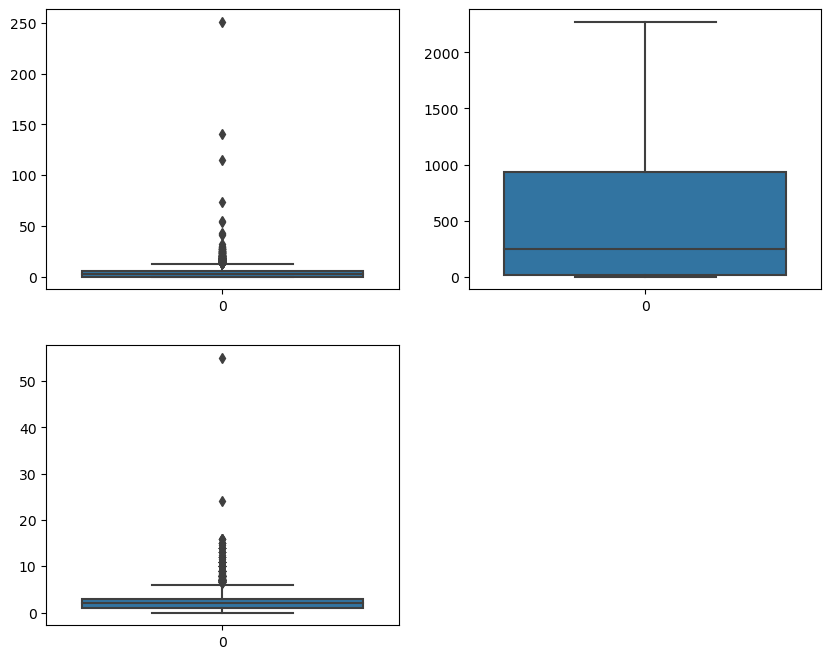

In [127]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.boxplot(leads['TotalVisits'])

plt.subplot(2,2,2)
sns.boxplot(leads['Total Time Spent on Website'])

plt.subplot(2,2,3)
sns.boxplot(leads['Page Views Per Visit'])

We see there are outliers in 'TotalVisits' and 'Page Views Per Visit'. We will replace them their medians.

In [128]:
# Imputing outliers of TotalVisits with it's median
q1 = leads['TotalVisits'].quantile(0.25)
q3 = leads['TotalVisits'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
leads['TotalVisits'] = np.where((leads['TotalVisits'] < lower_tail) | (leads['TotalVisits'] > upper_tail), leads['TotalVisits'].median(), leads['TotalVisits'])

In [129]:
# Imputing outliers of Page Views Per Visit with it's median
q1 = leads['Page Views Per Visit'].quantile(0.25)
q3 = leads['Page Views Per Visit'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
leads['Page Views Per Visit'] = np.where((leads['Page Views Per Visit'] < lower_tail) | (leads['Page Views Per Visit'] > upper_tail), leads['Page Views Per Visit'].median(), leads['Page Views Per Visit'])

In [130]:
# Recheck the outliers
leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].describe(percentiles=[0.25, 0.5, 0.75, 0.9, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,2.985606,487.698268,2.099261
std,2.628268,548.021466,1.611926
min,0.000000,0.000000,0.000000
25%,0.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,4.000000,936.000000,3.000000
90%,7.000000,1380.000000,4.000000
95%,8.000000,1562.000000,5.000000
99%,11.000000,1840.610000,6.000000


### Choosing highly correlated features to create model

In [131]:
correlation=(leads.corr()['Converted'])
del correlation['Converted']
correlation.sort_values(ascending=True)


Tags_Ringing                                                              -0.283895
What is your current occupation_Unemployed                                -0.281065
Last Notable Activity_Modified                                            -0.244294
Last Activity_Olark Chat Conversation                                     -0.210809
Tags_Interested in other courses                                          -0.179365
Do Not Email                                                              -0.135580
Lead Source_Olark Chat                                                    -0.129459
Tags_switched off                                                         -0.123718
Specialization_Finance Management                                         -0.121951
Last Activity_Email Bounced                                               -0.120095
Last Activity_Converted to Lead                                           -0.117383
Tags_Not doing further education                                          -0

In [132]:
# considering the columns which have correlation between +/- 0.2
correlation[(correlation<-0.2) | (correlation>0.2)]

Total Time Spent on Website                             0.362483
Lead Origin_Lead Add Form                               0.321702
Lead Source_Reference                                   0.270830
Last Activity_Olark Chat Conversation                  -0.210809
Last Activity_SMS Sent                                  0.325600
What is your current occupation_Unemployed             -0.281065
What is your current occupation_Working Professional    0.313837
Tags_Closed by Horizzon                                 0.251229
Tags_Ringing                                           -0.283895
Tags_Will revert after reading the email                0.339760
Last Notable Activity_Modified                         -0.244294
Last Notable Activity_SMS Sent                          0.351845
Name: Converted, dtype: float64

In [133]:
selected_col = ['Converted', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Reference', 'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Closed by Horizzon', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent']
leads_new = leads[selected_col]
leads_new.describe()

,Converted,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Reference,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,487.698268,0.077706,0.057792,0.105303,0.297078,0.897186,0.076407,0.038745,0.130195,0.587121,0.368723,0.235065
std,0.486714,548.021466,0.267722,0.233363,0.306960,0.456996,0.303732,0.265662,0.192996,0.336536,0.492378,0.482485,0.424062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,248.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,936.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,2272.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 6: Split the dataset into train and test sets

In [134]:
# Separating feature variables and dependent variable

X = leads_new.drop('Converted', axis=1)
y = leads_new['Converted']

In [135]:
# Splitting dataset into train and test

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 7: Feature scaling

In [136]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website']] = scaler.fit_transform(X_train[['Total Time Spent on Website']])
X_train.head()   

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Reference,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
1871,-0.885371,0,0,0,0,1,0,0,1,0,0,0
6795,0.005716,0,0,0,0,1,0,0,0,1,0,0
3516,-0.691418,0,0,0,0,1,0,0,1,0,0,0
8105,1.365219,0,0,0,1,1,0,0,1,0,0,1
3934,-0.885371,0,0,0,0,1,0,0,0,1,1,0


In [137]:
(leads['Converted'].sum()/leads.shape[0]) * 100

38.53896103896104

### Step 8: Model building

##### Feature selection using RFE

In [138]:
# Creating logistic regression object
logreg = LogisticRegression()

# running RFE with 11 variables
rfe = RFE(logreg, n_features_to_select=11)
rfe = rfe.fit(X_train, y_train)

In [139]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Reference', False, 2),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Ringing', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_SMS Sent', True, 1)]

In [140]:
# features selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [141]:
# features eliminated by RFE
X_train.columns[~ rfe.support_]

Index(['Lead Source_Reference'], dtype='object')

In [142]:
# rfe.predict_proba(X_train).shape, X_train.shape

In [143]:
# rfe.predict_proba(X_train)

### Building the model using stats model

Creating helper functions to build model, check VIF and retrieve metrics

In [144]:
# function to build model using stats model
def build_model(X, y):
    X_train_sm = sm.add_constant(X)
    logm = sm.GLM(y, X_train_sm, family=sm.families.Binomial()).fit()
    return logm, X_train_sm

In [145]:
# function to create a dataframe that will contain the names of all the feature variables and their respective VIFs
def get_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [146]:
# function to get few accuracy, precision, recall and f1 score
def get_metrics(actual, predict, cutoff):
    accuracy = metrics.accuracy_score(actual, predict[cutoff])
    precision = metrics.precision_score(actual, predict[cutoff])
    recall = metrics.recall_score(actual, predict[cutoff])
    f1_score = metrics.f1_score(actual, predict[cutoff])
    print(f"accuracy: {round(accuracy, 2)}")
    print(f"precision: {round(precision, 2)}")
    print(f"recall: {round(recall, 2)}")
    print(f"f1_score: {round(f1_score, 2)}")    

Model 1

In [147]:
# Build the model1 using stats model
logm1, X_train_sm = build_model(X_train[col], y_train)
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2107.6
Date:                Thu, 11 Jan 2024   Deviance:                       4215.2
Time:                        10:18:03   Pearson chi2:                 9.16e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4922
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5853      0.262     -6.057      0.000      -2.098      -1.072
Total Time Spent on Website                              0.9841      0.041     24.028      0.000       0.904       1.064
Lead Origin_Lead Add Form                                3.2119      0.217     14.814      0.000       2.787       3.637
Last Activity_Olark Chat Conversation                   -0.5817      0.173     -3.353      0.001      -0.922      -0.242
Last Activity_SMS Sent                                   0.8990      0.161      5.588      0.000       0.584       1.214
What is your current occupation_Unemployed              -0.6573      0.257     -2.556      0.011      -1.161      -0.153
What is your current occupation_Working Professional     1.8255      0.329      5.549      0.000       1.181       2.470
Tags_Closed by Horizzon                                  7.1621      1.020      7.023      0.000       5.163       9.161
Tags_Ringing                                            -2.8576      0.243    -11.748      0.000      -3.334      -2.381
Tags_Will revert after reading the email                 1.8043      0.100     18.066      0.000       1.609       2.000
Last Notable Activity_Modified                          -1.0228      0.106     -9.669      0.000      -1.230      -0.815
Last Notable Activity_SMS Sent                           1.0547      0.191      5.533      0.000       0.681       1.428
========================================================================================================================
"""

In [148]:
# get VIF
get_vif(X_train[col])

,Features,VIF
10,Last Notable Activity_SMS Sent,6.32
3,Last Activity_SMS Sent,6.11
4,What is your current occupation_Unemployed,5.22
8,Tags_Will revert after reading the email,3.55
9,Last Notable Activity_Modified,2.41
7,Tags_Ringing,1.60
5,What is your current occupation_Working Profes...,1.56
6,Tags_Closed by Horizzon,1.39
1,Lead Origin_Lead Add Form,1.38
2,Last Activity_Olark Chat Conversation,1.38


In [149]:
# drop the column Last Notable Activity_SMS Sent as it has high correlation
col = col.drop('Last Notable Activity_SMS Sent',1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

Model 2

In [150]:
# Rerun to build model2 using stats model
logm2, X_train_sm = build_model(X_train[col], y_train)
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2123.2
Date:                Thu, 11 Jan 2024   Deviance:                       4246.3
Time:                        10:18:03   Pearson chi2:                 8.97e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4897
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4604      0.260     -5.611      0.000      -1.970      -0.950
Total Time Spent on Website                              0.9831      0.041     24.063      0.000       0.903       1.063
Lead Origin_Lead Add Form                                3.1827      0.215     14.769      0.000       2.760       3.605
Last Activity_Olark Chat Conversation                   -0.4483      0.173     -2.586      0.010      -0.788      -0.109
Last Activity_SMS Sent                                   1.6498      0.087     19.001      0.000       1.480       1.820
What is your current occupation_Unemployed              -0.6642      0.257     -2.580      0.010      -1.169      -0.160
What is your current occupation_Working Professional     1.8644      0.330      5.651      0.000       1.218       2.511
Tags_Closed by Horizzon                                  7.2832      1.021      7.130      0.000       5.281       9.285
Tags_Ringing                                            -2.7434      0.240    -11.441      0.000      -3.213      -2.273
Tags_Will revert after reading the email                 1.7629      0.099     17.794      0.000       1.569       1.957
Last Notable Activity_Modified                          -1.3627      0.090    -15.221      0.000      -1.538      -1.187
========================================================================================================================
"""

In [151]:
# get VIF
get_vif(X_train[col])

,Features,VIF
4,What is your current occupation_Unemployed,5.03
8,Tags_Will revert after reading the email,3.55
9,Last Notable Activity_Modified,1.86
3,Last Activity_SMS Sent,1.63
7,Tags_Ringing,1.60
5,What is your current occupation_Working Profes...,1.52
1,Lead Origin_Lead Add Form,1.38
6,Tags_Closed by Horizzon,1.38
2,Last Activity_Olark Chat Conversation,1.34
0,Total Time Spent on Website,1.13


#### Inferences from model2
- The p-value of all the coefficients of 10 predictors are almost zero which means they are statistically significant, the association is not purely by chance.
- VIF of all the 10 independent varaibles are almost <= 5. This explains the correlation among these independent variables is minimal.
- Therefore model2 is a fairly decent model

### Step 9: Getting predicted values and analysing the metrics on train set

In [152]:
y_train_pred = logm2.predict(X_train_sm).values
y_train_pred

array([0.00320976, 0.41193006, 0.00388141, ..., 0.2258277 , 0.01927518,
       0.06948149])

In [153]:
#### Creating dataframe with actual Converted and predicted probabilites
y_train_pred_final = pd.DataFrame({'Converted' : y_train.values, 'Converted_Prob' : y_train_pred})
y_train_pred_final['LeadNumber'] = y_train.index
y_train_pred_final

,Converted,Converted_Prob,LeadNumber
0,0,0.003210,1871
1,0,0.411930,6795
2,0,0.003881,3516
3,0,0.132855,8105
4,0,0.069481,3934
...,...,...,...
6463,1,0.875517,350
6464,1,0.987687,79
6465,1,0.225828,8039
6466,0,0.019275,6936


#### Finding optimal cutoff point

In [154]:
y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber
0,0,0.003210,1871
1,0,0.411930,6795
2,0,0.003881,3516
3,0,0.132855,8105
4,0,0.069481,3934


In [155]:
# Let's create columns with different probability cutoffs
numbers = [x/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_Prob.apply(lambda x: 1 if x > i else 0)
y_train_pred_final.head() 

,Converted,Converted_Prob,LeadNumber,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.003210,1871,1,0,0,0,0,0,0,0,0,0
1,0,0.411930,6795,1,1,1,1,1,0,0,0,0,0
2,0,0.003881,3516,1,0,0,0,0,0,0,0,0,0
3,0,0.132855,8105,1,1,0,0,0,0,0,0,0,0
4,0,0.069481,3934,1,0,0,0,0,0,0,0,0,0


In [156]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381262     1.000000     0.000000
0.1   0.1  0.720161     0.952960     0.576712
0.2   0.2  0.766852     0.932279     0.664918
0.3   0.3  0.831942     0.856853     0.816592
0.4   0.4  0.867192     0.819546     0.896552
0.5   0.5  0.876623     0.800081     0.923788
0.6   0.6  0.872140     0.763585     0.939030
0.7   0.7  0.842610     0.647607     0.962769
0.8   0.8  0.822975     0.563260     0.983008
0.9   0.9  0.779839     0.435523     0.992004


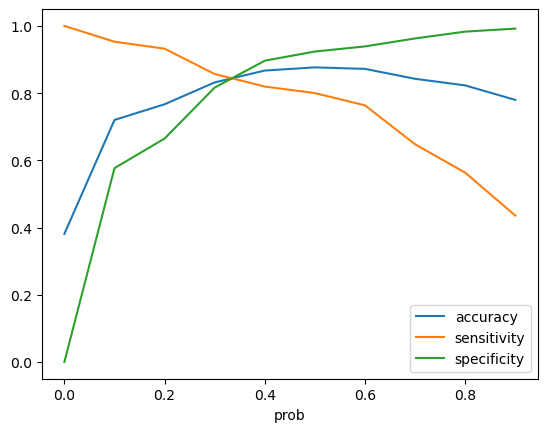

In [157]:
# plot accuracy, sensitivity and specificity to find the optimal cutoff point
cutoff_df.plot.line(x='prob', y= ['accuracy', 'sensitivity', 'specificity'])
plt.show()

From the above curve, 0.3 is the optimum point to take as it is the cutff probability

In [158]:
#### Creating new column predicted_0.3 with 1 if Churn_Prob > 0.3 else 0

y_train_pred_final['predicted_0.3'] = y_train_pred_final['Converted_Prob'].apply(lambda x : 1 if x > 0.3 else 0 )
y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_0.3
0,0,0.003210,1871,1,0,0,0,0,0,0,0,0,0,0
1,0,0.411930,6795,1,1,1,1,1,0,0,0,0,0,1
2,0,0.003881,3516,1,0,0,0,0,0,0,0,0,0,0
3,0,0.132855,8105,1,1,0,0,0,0,0,0,0,0,0
4,0,0.069481,3934,1,0,0,0,0,0,0,0,0,0,0


In [159]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final['predicted_0.3'])
confusion

array([[3268,  734],
       [ 353, 2113]], dtype=int64)

In [160]:
# Calculate accuracy
print(f"accuracy: {metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['predicted_0.3'])}")

accuracy: 0.8319418676561534


In [161]:
sensitivity = confusion[1,1]/(confusion[1,0]+confusion[1,1])
specificity = confusion[0,0]/(confusion[0,0]+confusion[0,1])
print(f"sensitivity: {sensitivity}, specificity: {specificity}")

sensitivity: 0.856853203568532, specificity: 0.816591704147926


#### Precision and Recall view

Using sklearn utilities to find precision and recall

In [162]:
# Calculate accuracy, precision, recall, f1 score for 0.3 cutoff
get_metrics(y_train_pred_final.Converted, y_train_pred_final,'predicted_0.3' )

accuracy: 0.83
precision: 0.74
recall: 0.86
f1_score: 0.8


#### Precision and recall tradeoff

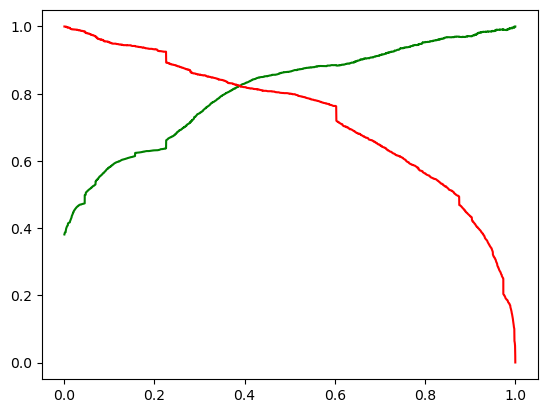

In [163]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the above plot, 0.4 is optimum point as it is the cutoff point probability

In [164]:
# Create confusion matrix for 0.4 cutoff
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final['predicted_0.3'])
print(confusion)

[[3268  734]
 [ 353 2113]]


In [165]:
# Calculate accuracy, precision, recall, f1 score for 0.4 cutoff
get_metrics(y_train_pred_final.Converted, y_train_pred_final, 0.4)

accuracy: 0.87
precision: 0.83
recall: 0.82
f1_score: 0.82


In [166]:
sensitivity = confusion[1,1]/(confusion[1,0]+confusion[1,1])
specificity = confusion[0,0]/(confusion[0,0]+confusion[0,1])
print(f"sensitivity: {sensitivity}, specificity: {specificity}")

sensitivity: 0.856853203568532, specificity: 0.816591704147926


In [167]:
# print classification
print(metrics.classification_report(y_train_pred_final.Converted, y_train_pred_final[0.4]))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      4002
           1       0.83      0.82      0.82      2466

    accuracy                           0.87      6468
   macro avg       0.86      0.86      0.86      6468
weighted avg       0.87      0.87      0.87      6468



#### ROC curve (Receiver Operating Characteristic)

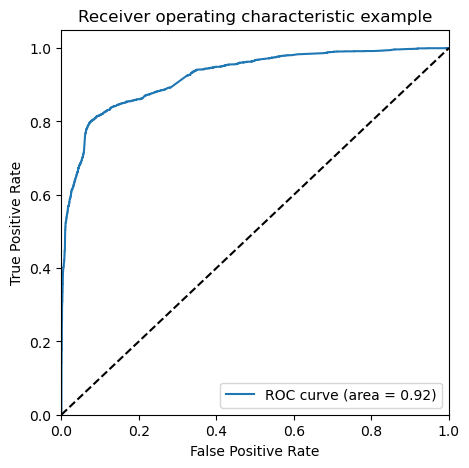

In [168]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final['Converted_Prob'])

In [169]:
print(f"roc auc score: {round(roc_auc_score(y_train_pred_final.Converted, y_train_pred_final['Converted_Prob']), 2)}")

roc auc score: 0.92


ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether the lead will convert successfully or not.

There should be a linear relationship between the logit of the outcome and each predictor variable.

### Step 10: Making predictions on test set using cutoff point 0.4

In [170]:
# scaling on test data
X_test[['Total Time Spent on Website']] = scaler.transform(X_test[['Total Time Spent on Website']])
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Reference,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
4269,0.964504,0,0,0,1,1,0,0,0,1,0,1
2376,-0.885371,1,1,0,1,1,0,0,0,1,0,1
7766,-0.777416,0,0,0,0,0,1,0,0,1,0,0
9199,-0.885371,0,0,1,0,1,0,0,0,0,1,0
4359,-0.885371,1,1,0,0,1,0,0,0,1,0,0


In [171]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified
4269,0.964504,0,0,1,1,0,0,0,1,0
2376,-0.885371,1,0,1,1,0,0,0,1,0
7766,-0.777416,0,0,0,0,1,0,0,1,0
9199,-0.885371,0,1,0,1,0,0,0,0,1
4359,-0.885371,1,0,0,1,0,0,0,1,0


In [172]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = logm2.predict(X_test_sm)
y_test_pred[:10]

4269    0.903474
2376    0.973416
7766    0.802608
9199    0.008115
4359    0.875517
9186    0.820347
1631    0.643409
8963    0.320835
8007    0.121758
5324    0.669434
dtype: float64

In [173]:
# Converting y_pred to a dataframe which is an array
y_test_pred_1 = pd.DataFrame(y_test_pred)
y_test_pred_1.head()

,0
4269,0.903474
2376,0.973416
7766,0.802608
9199,0.008115
4359,0.875517


In [174]:
# Converting y_test to a dataframe which is an array
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [175]:
y_test_df["LeadNumber"] = y_test_df.index
y_test_df.head()

,Converted,LeadNumber
4269,1,4269
2376,1,2376
7766,1,7766
9199,0,9199
4359,1,4359


In [176]:
# Removing index on both datasets to append them side by side
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [177]:
# Appending y_test_df and y_test_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred_1], axis=1)
y_test_pred_final.head()

,Converted,LeadNumber,0
0,1,4269,0.903474
1,1,2376,0.973416
2,1,7766,0.802608
3,0,9199,0.008115
4,1,4359,0.875517


In [178]:
y_test_pred_final.rename(columns={0:'Converted_Prob'}, inplace=True)

In [179]:
y_test_pred_final['final_predicted'] = y_test_pred_final['Converted_Prob'].apply(lambda x:1 if x > 0.4 else 0)
y_test_pred_final.head()

,Converted,LeadNumber,Converted_Prob,final_predicted
0,1,4269,0.903474,1
1,1,2376,0.973416,1
2,1,7766,0.802608,1
3,0,9199,0.008115,0
4,1,4359,0.875517,1


In [180]:
# confusion matrix
confusion_test = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted)
confusion_test

array([[1493,  184],
       [ 198,  897]], dtype=int64)

In [181]:
# Calculate accuracy, precision, recall, f1 score for 0.4 cutoff on test set
get_metrics(y_test_pred_final.Converted, y_test_pred_final, 'final_predicted')

accuracy: 0.86
precision: 0.83
recall: 0.82
f1_score: 0.82


In [182]:
# print classification
print("\n     **********Test Classification Report****************\n")
print(metrics.classification_report(y_test_pred_final.Converted, y_test_pred_final['final_predicted']))


     **********Test Classification Report****************

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1677
           1       0.83      0.82      0.82      1095

    accuracy                           0.86      2772
   macro avg       0.86      0.85      0.86      2772
weighted avg       0.86      0.86      0.86      2772



In [183]:
# ROC AUC score
print(f"roc auc score: {round(roc_auc_score(y_test_pred_final.Converted, y_test_pred_final.Converted_Prob), 2)}")

roc auc score: 0.92


<Axes: >

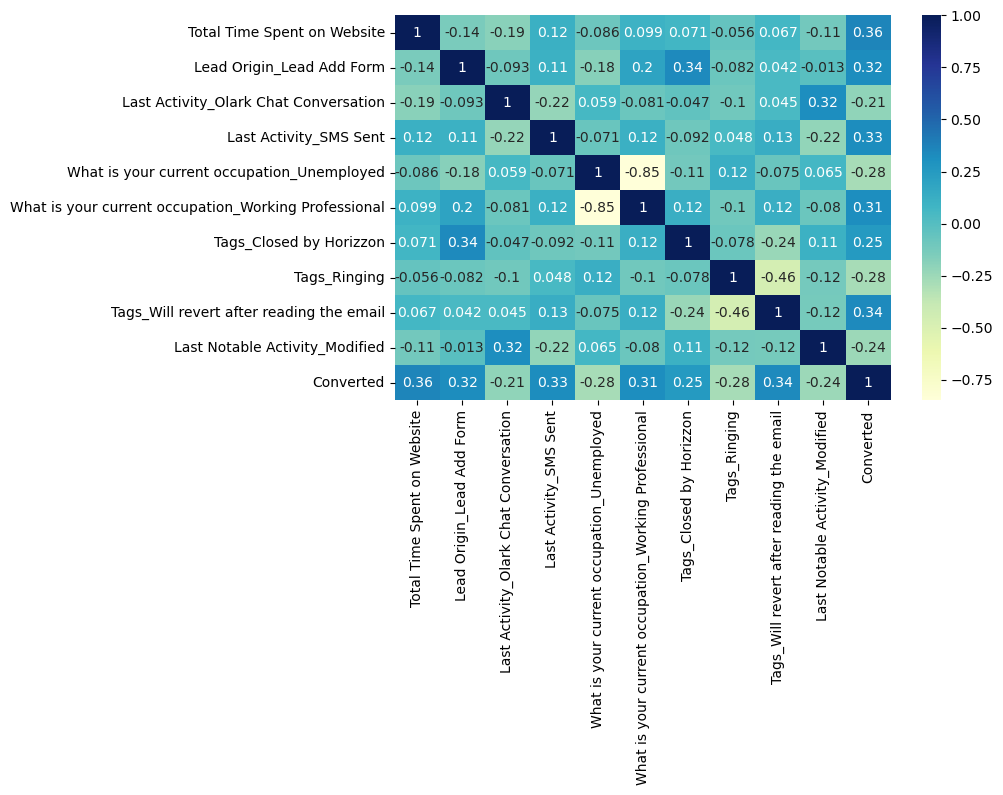

In [184]:
# Correlation between final features
final_features = ['Total Time Spent on Website', 'Lead Origin_Lead Add Form','Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent','What is your current occupation_Unemployed','What is your current occupation_Working Professional', 'Tags_Closed by Horizzon', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Last Notable Activity_Modified', 'Converted']

plt.figure(figsize=(8,5))
sns.heatmap(leads_new[final_features].corr(), cmap="YlGnBu", annot=True)

The above plot shows that the final predictors seems to have fairly low correlations.

**Conclusion**
#### Metircs on train dataset
    accuracy: 0.87
    precision: 0.83
    recall: 0.82
    f1_score: 0.82
    roc auc score: 0.92
#### Metrics on test dataset
    accuracy: 0.86
    precision: 0.83
    recall: 0.82
    f1_score: 0.82
    roc auc score: 0.92

##### The logistic regression model accuracy is 0.87, so the model does a decent job in predicting whether a lead can get converted or not.
#####  ROC AUC of our model approaches towards 1. Hence we can conclude that this model does good job in prediction.
#####  The metrics on train dataset are almost near to each other and above 80%, and the same is with test dataset.This shows that this model isn't showing any signs of overfitting.
